# **Inserting or importing the data set**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = '/content/household_power_consumption.txt'

# Load the data
df = pd.read_csv(file_path, sep=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False)

print(df.head())

             Datetime Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00               4.216                 0.418  234.840   
1 2006-12-16 17:25:00               5.360                 0.436  233.630   
2 2006-12-16 17:26:00               5.374                 0.498  233.290   
3 2006-12-16 17:27:00               5.388                 0.502  233.740   
4 2006-12-16 17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


# **Pre-processing of dataset**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as needed
df = df.dropna()

df.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert data types if needed
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df['Sub_metering_3'] = df['Sub_metering_3'].astype(float)

# Compute basic statistics
print(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].describe())

# Identify trends and patterns
df.set_index('Datetime', inplace=True)
print(df.resample('D').mean())

Datetime                    0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              1
Sub_metering_3           3941
dtype: int64
       Global_active_power  Global_reactive_power        Voltage  \
count        680844.000000          680844.000000  680844.000000   
mean              1.176996               0.112777     239.747025   
std               1.181857               0.106776       3.593573   
min               0.082000               0.000000     223.490000   
25%               0.294000               0.000000     237.330000   
50%               0.612000               0.094000     240.050000   
75%               1.624000               0.176000     242.250000   
max              10.670000               1.148000     252.140000   

       Global_intensity  
count     680844.000000  
mean           5.005169  
std            4.988575  
min            0.400000  
25% 

# **Linear regression with 100 data**

<ipython-input-5-fa0daeffec45>:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df1 = pd.read_csv('/content/household_power_consumption.txt', sep=';', parse_dates={'Datetime': ['Date', 'Time']},
<ipython-input-5-fa0daeffec45>:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1 = pd.read_csv('/content/household_power_consumption.txt', sep=';', parse_dates={'Datetime': ['Date', 'Time']},
<ipython-input-5-fa0daeffec45>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Mean Squared Error: 0.7798819840538866
R^2 Score: 0.4139174428196062
score for test: 0.4139174428196062
score for train: 0.41082946151009203


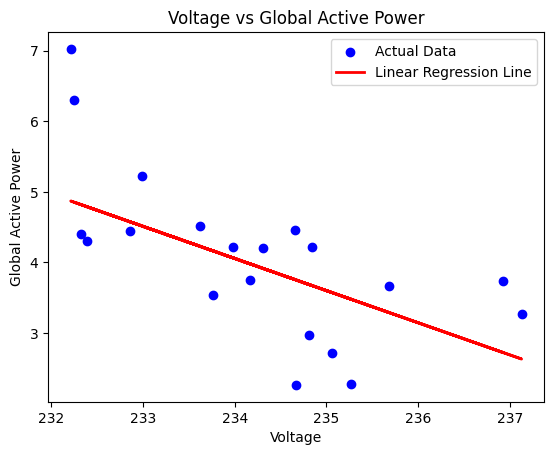

    Actual Spending  Predicted Spending
83            4.218            4.064965
53            4.202            3.914748
70            3.538            4.165110
45            4.464            3.755426
44            6.308            4.852467
39            3.740            2.722114
22            7.026            4.870675
80            2.978            3.687146
10            4.448            4.574793
0             4.216            3.673490
18            3.266            2.631073
30            2.720            3.573345
73            4.408            4.820603
33            4.512            4.228838
90            4.298            4.788739
4             3.666            3.291118
76            2.264            3.750874
77            2.270            3.477752
12            5.224            4.515616
31            3.758            3.978476


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



df1 = pd.read_csv('/content/household_power_consumption.txt', sep=';', parse_dates={'Datetime': ['Date', 'Time']},
                  infer_datetime_format=True, low_memory=False)

df1.replace('?', pd.NA, inplace=True)
df1.dropna(inplace=True)

df=df1.head(100)
# Explicitly convert columns to numeric, handling errors
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df.dropna(inplace=True)

X = df[['Voltage']]  #  (independent variable)
y = df['Global_active_power']  # (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'score for test: {model.score(X_test,y_test)}')
print(f'score for train: {model.score(X_train,y_train)}')

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power')
plt.title('Voltage vs Global Active Power')
plt.legend()
plt.show()

predicted_values = pd.DataFrame({'Actual Spending': y_test, 'Predicted Spending': y_pred})
print(predicted_values)